In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

from IPython.core.display import HTML
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [68]:
def vscode_settings():
    # Set plot style and size
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 7]
    plt.rcParams['font.size'] = 24
    
    # Set pandas display settings
    pd.options.display.max_columns = None
    pd.set_option('display.expand_frame_repr', False)
    pd.set_option('display.max_columns', None)
    
    # Set seaborn as default for statistical plots
    sns.set()

# Apply settings
vscode_settings()

In [69]:
df_raw = pd.read_csv('health_insurance_cross-sell/data/raw/train.csv')

In [70]:
df_raw.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# Data Description

## Check Data Type

In [71]:
df1 = df_raw.copy()

In [72]:
df1.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

## Check NA

In [73]:
df1.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

## Data Dimensions

In [74]:
print("Number of rows: {}".format(df1.shape[0]))
print("Number of Columns: {}".format(df1.shape[1]))

Number of rows: 381109
Number of Columns: 12


## Descriptive Statistical

### Numerical Attributes

In [75]:
num_attributes = df1.select_dtypes(['int64', 'float64'])

In [76]:
#mean median

ct1 = pd.DataFrame(num_attributes.apply(lambda x: x.mean())).T
ct2 = pd.DataFrame(num_attributes.apply(lambda x: x.median())).T

#Dispersion - Std, Min, Max, Range, Skew, Kurtosis

d1 = pd.DataFrame(num_attributes.apply(lambda x: x.std())).T
d2 = pd.DataFrame(num_attributes.apply(lambda x: x.min())).T
d3 = pd.DataFrame(num_attributes.apply(lambda x: x.max())).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.0,381109.0,381108.0,190555.000000,190555.0,110016.836208,9.443274e-16,-1.200000
1,Age,20.0,85.0,65.0,38.822584,36.0,15.511611,6.725390e-01,-0.565655
2,Driving_License,0.0,1.0,1.0,0.997869,1.0,0.046110,-2.159518e+01,464.354302
3,Region_Code,0.0,52.0,52.0,26.388807,28.0,13.229888,-1.152664e-01,-0.867857
4,Previously_Insured,0.0,1.0,1.0,0.458210,0.0,0.498251,1.677471e-01,-1.971871
5,Annual_Premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.155057,1.766087e+00,34.004569
6,Policy_Sales_Channel,1.0,163.0,162.0,112.034295,133.0,54.203995,-9.000081e-01,-0.970810
7,Vintage,10.0,299.0,289.0,154.347397,154.0,83.671304,3.029517e-03,-1.200688
8,Response,0.0,1.0,1.0,0.122563,0.0,0.327936,2.301906e+00,3.298788


### Categorical Attributes

In [77]:
cat_attributes = df1[['Gender', 'Vehicle_Age', 'Vehicle_Damage', 'Response', 'Previously_Insured']]

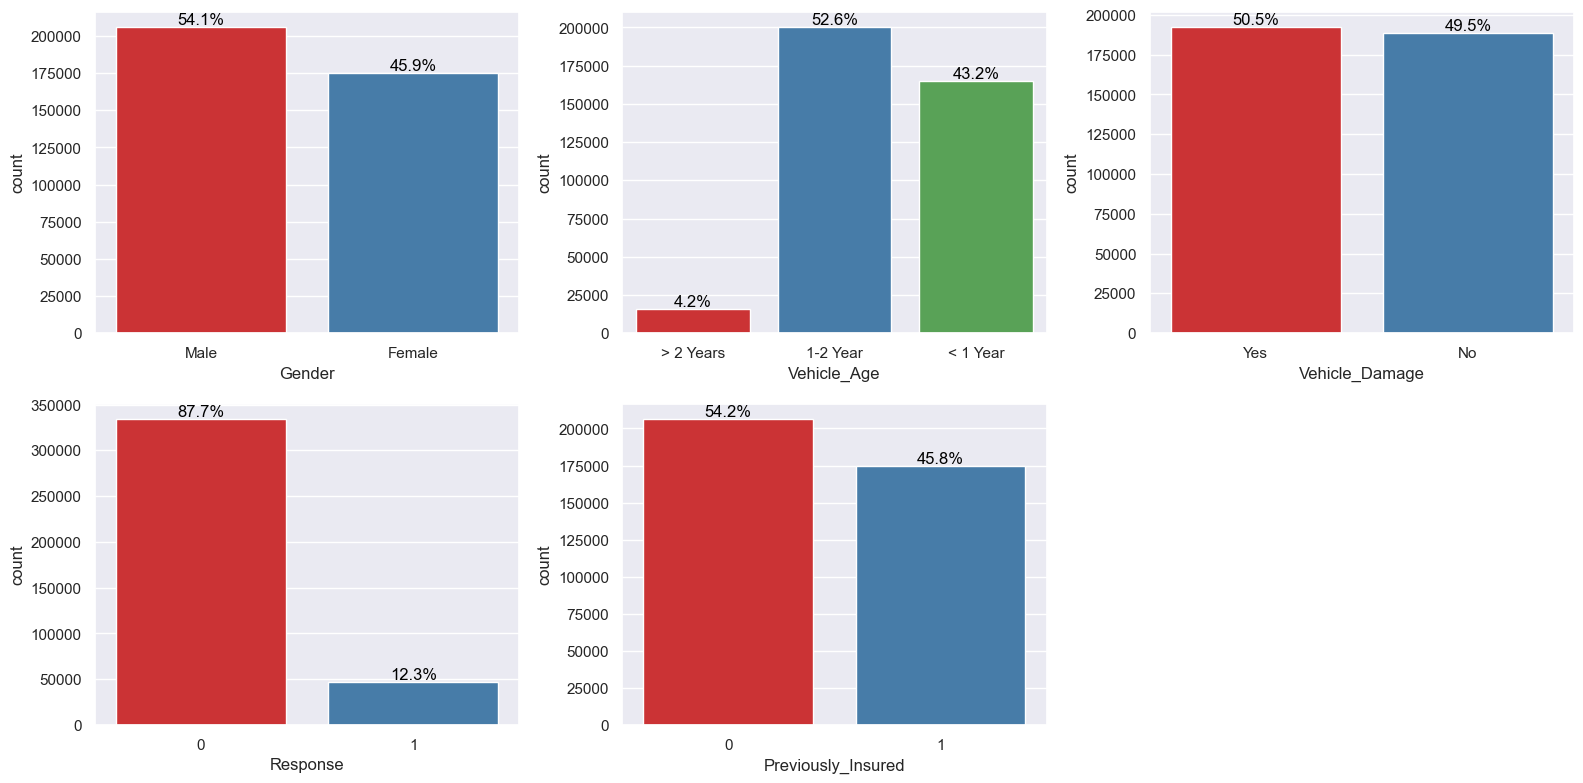

In [78]:
# Set the figure size
plt.figure(figsize=(16, 8))

# Function to add percentages on top of the bars
def add_percentages(ax):
    total = len(cat_attributes)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), 
                    textcoords='offset points')

# Create the countplots with different colors and add percentages

# Plot 1: Gender
plt.subplot(2, 3, 1)
ax1 = sns.countplot(x='Gender', data=cat_attributes, palette='Set1')
add_percentages(ax1)

# Plot 2: Vehicle_Age
plt.subplot(2, 3, 2)
ax2 = sns.countplot(x='Vehicle_Age', data=cat_attributes, palette='Set1')
add_percentages(ax2)

# Plot 3: Vehicle_Damage
plt.subplot(2, 3, 3)
ax3 = sns.countplot(x='Vehicle_Damage', data=cat_attributes, palette='Set1')
add_percentages(ax3)

# Plot 4: Response
plt.subplot(2, 3, 4)
ax4 = sns.countplot(x='Response', data=cat_attributes, palette='Set1')
add_percentages(ax4)

# Plot 5: Previously_Insured
plt.subplot(2, 3, 5)
ax5 = sns.countplot(x='Previously_Insured', data=cat_attributes, palette='Set1')
add_percentages(ax5)

# Show the plot
plt.tight_layout()
plt.show()

# Feature Engineering

In [79]:
df2 = df1.copy()

In [80]:
# Initialize the OneHotEncoder
#encoder = OneHotEncoder(sparse=False, drop='first')  # sparse=False for dense output, drop='first' to avoid dummy variable trap
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the 'Gender' column
gender_encoded = encoder.fit_transform(df2[['Gender']])

# Convert the result into a DataFrame and add it to the original DataFrame
gender_encoded_df = pd.DataFrame(gender_encoded, columns=encoder.get_feature_names_out(['Gender']))

# Concatenate the original DataFrame with the encoded column(s)
df_train = pd.concat([df2, gender_encoded_df], axis=1).drop('Gender', axis=1)

# Fit and transform the 'Vehicle_Damage' column
vehicle_dameged_encoded = encoder.fit_transform(df_train[['Vehicle_Damage']])

# Convert the result into a DataFrame and add it to the original DataFrame
vehicle_dameged_encoded_df = pd.DataFrame(vehicle_dameged_encoded, columns=encoder.get_feature_names_out(['Vehicle_Damage']))

# Concatenate the original DataFrame with the encoded column(s)
df2 = pd.concat([df2, vehicle_dameged_encoded_df], axis=1).drop('Vehicle_Damage', axis=1)

In [81]:
# Convert column names to snake_case
df2.columns = df2.columns.str.lower().str.replace(' ', '_')

In [82]:
# Create a mapping dictionary
vehicle_age_mapping = {
    '< 1 Year': 0,
    '1-2 Year': 1,
    '> 2 Years': 2
}

# Apply the mapping to the 'vehicle_age' column
df2['vehicle_age_numeric'] = df2['vehicle_age'].map(vehicle_age_mapping)

df2 = df2.drop('vehicle_age', axis=1)

In [83]:
df2.head()

,id,gender,age,driving_license,region_code,previously_insured,annual_premium,policy_sales_channel,vintage,response,vehicle_damage_yes,vehicle_age_numeric
0,1,Male,44,1,28.0,0,40454.0,26.0,217,1,1.0,2
1,2,Male,76,1,3.0,0,33536.0,26.0,183,0,0.0,1
2,3,Male,47,1,28.0,0,38294.0,26.0,27,1,1.0,2
3,4,Male,21,1,11.0,1,28619.0,152.0,203,0,0.0,0
4,5,Female,29,1,41.0,1,27496.0,152.0,39,0,0.0,0


# Exploratory Data Analysis

In [84]:
df3 = df2.copy()

## Univariate Analysis

### Response Variable

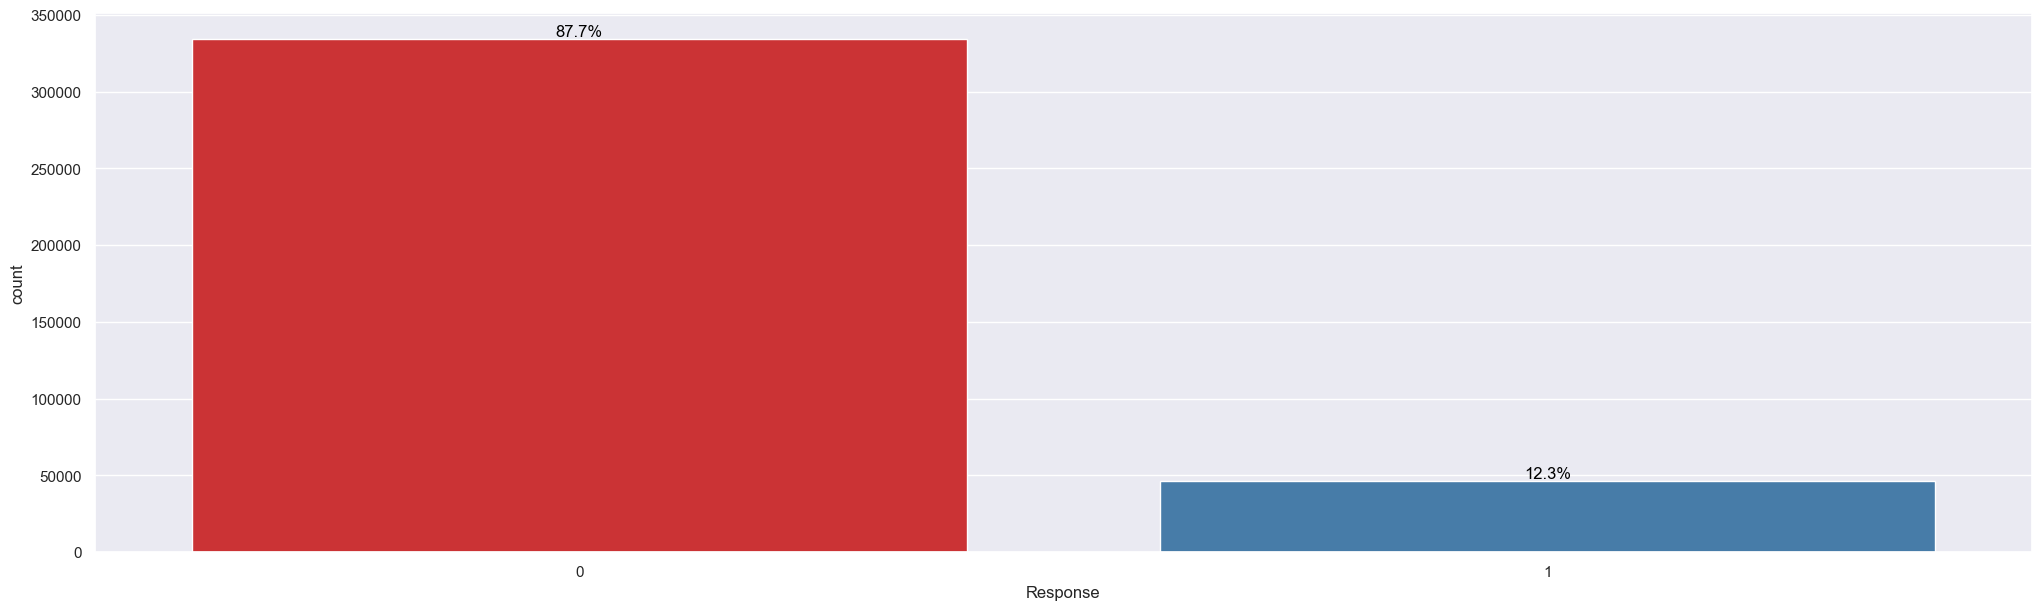

In [86]:
ax4 = sns.countplot(x='Response', data=cat_attributes, palette='Set1')
add_percentages(ax4)

### Numerical Features

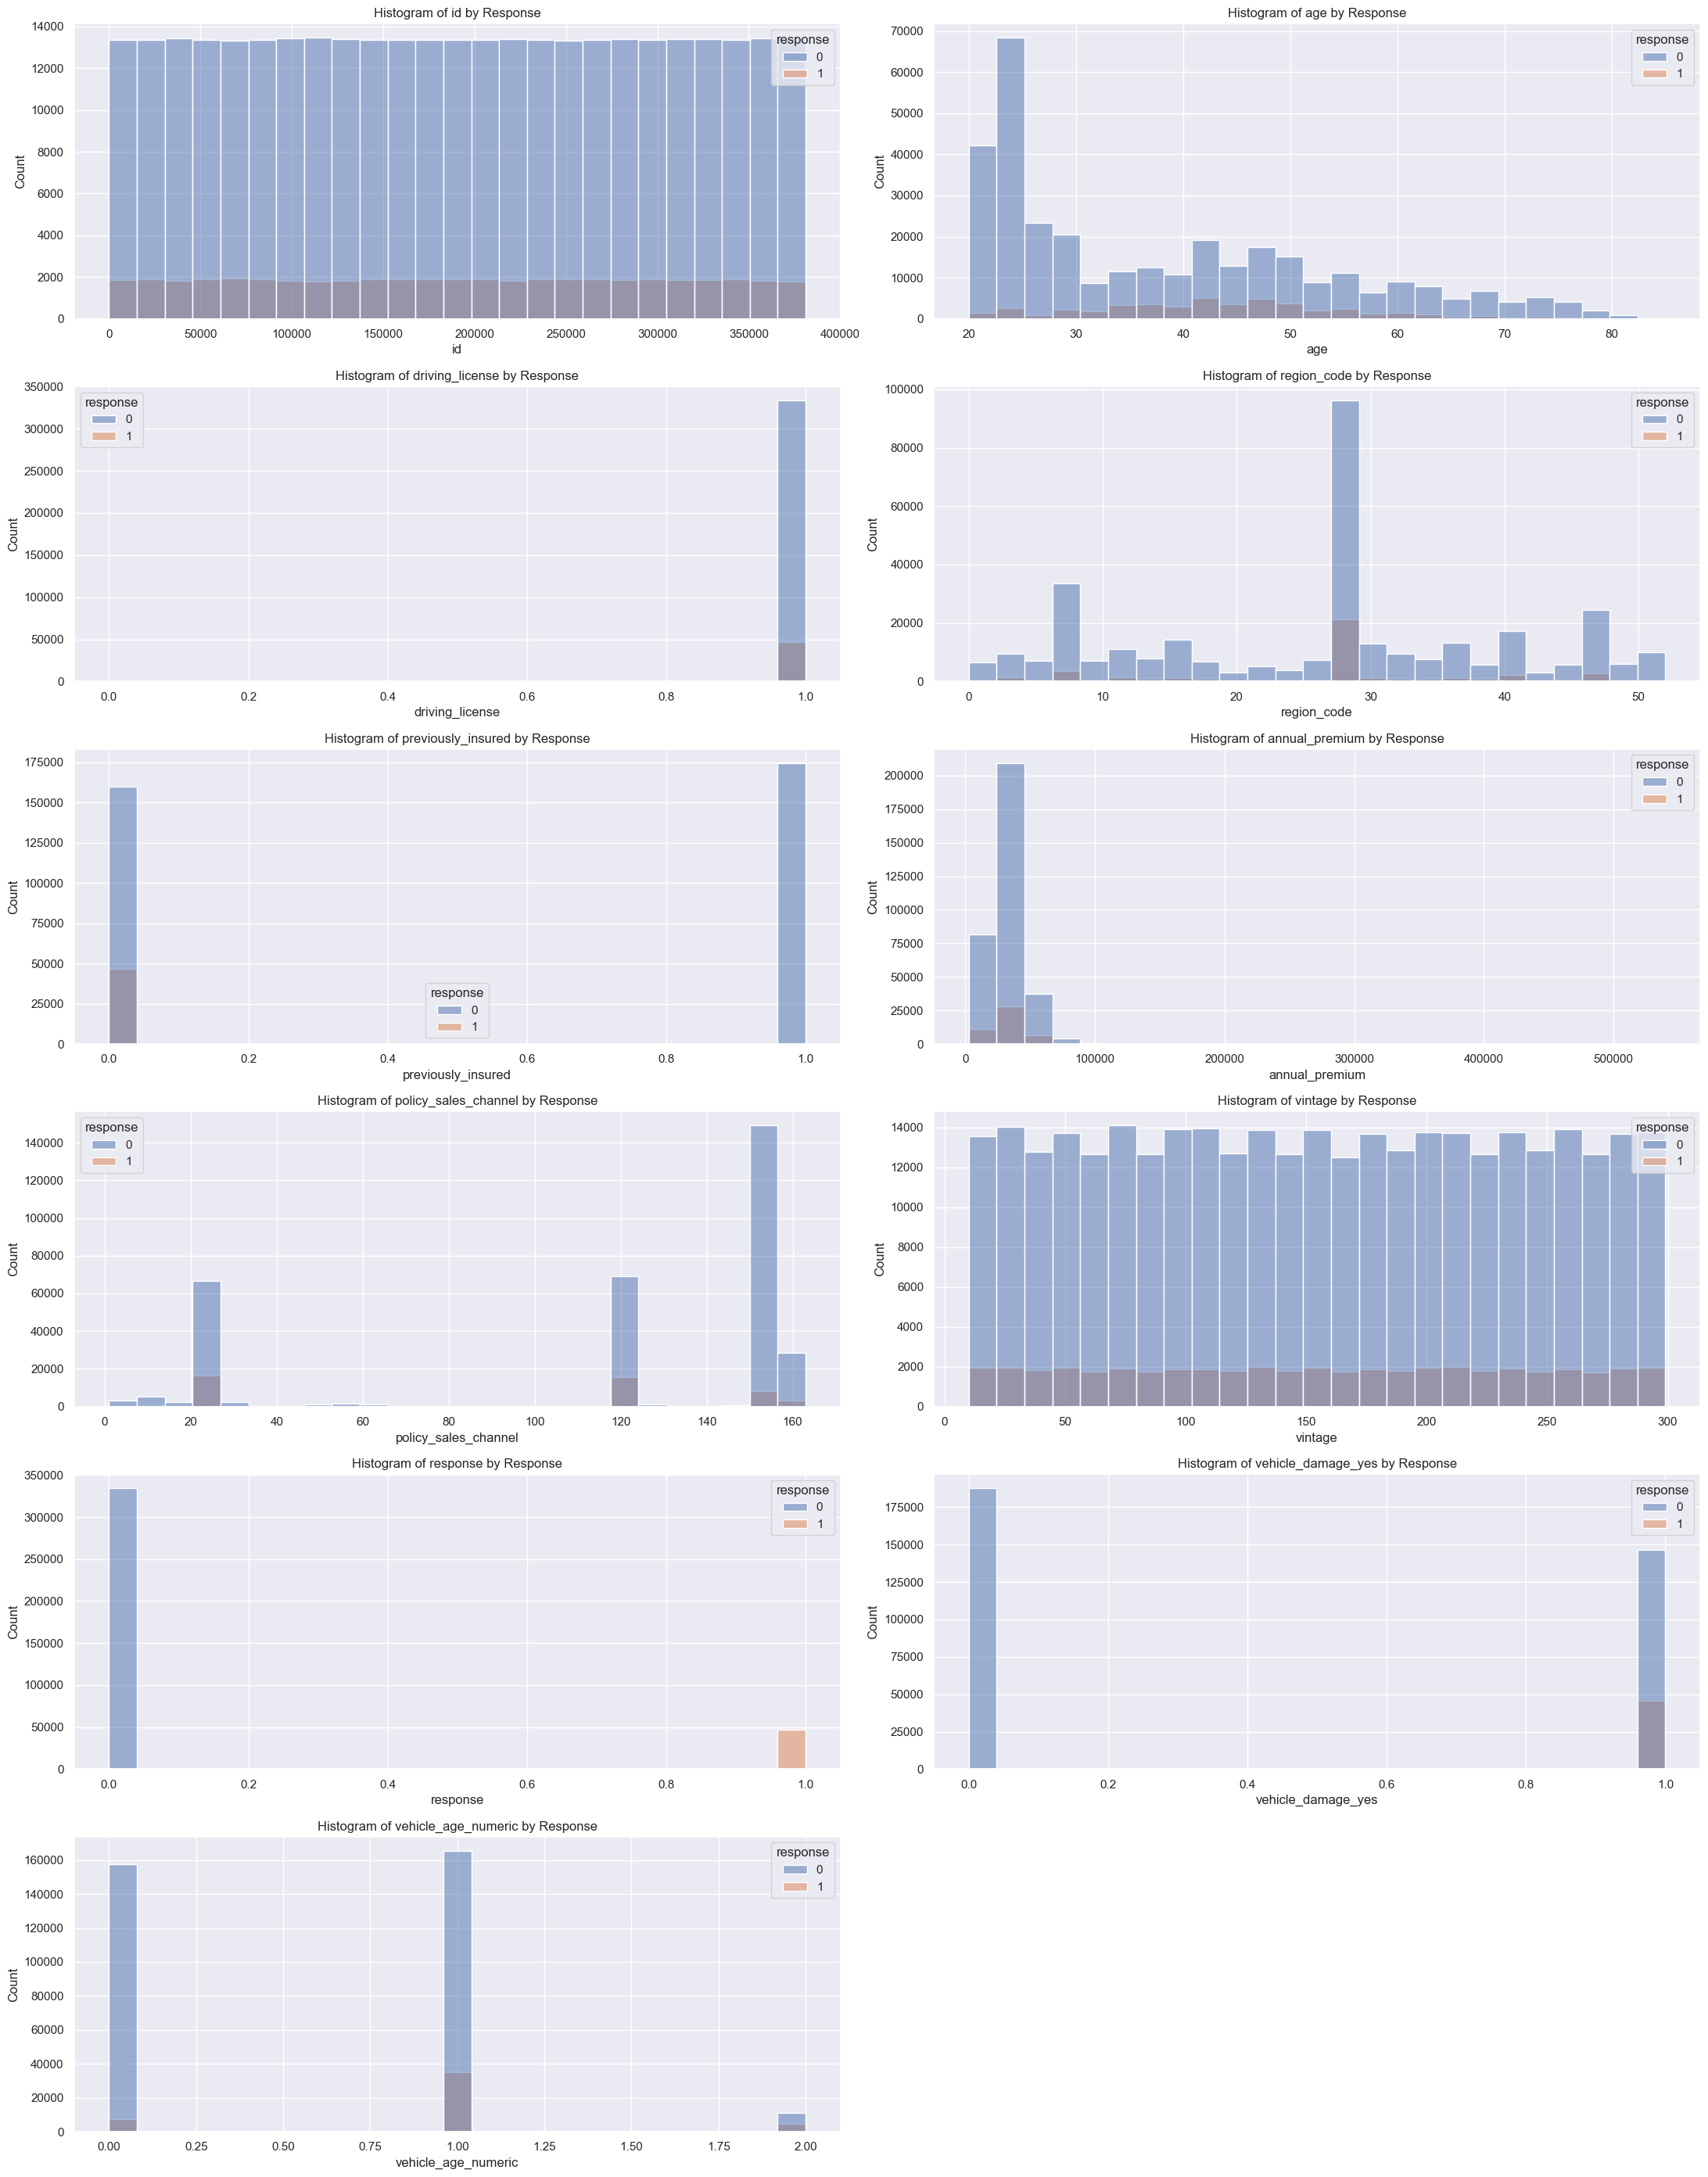

In [113]:
# List of numerical columns
num_attributes = df3.select_dtypes(include=['int64', 'float64'])
columns = num_attributes.columns.to_list()

# Create a figure with a 6x2 grid (12 subplots)
fig, axes = plt.subplots(6, 2, figsize=(22, 28))  # Adjust the size as needed
axes = axes.flatten()  # Flatten axes for easy iteration

# Loop through each numerical column and plot it on its respective subplot
for i, column in enumerate(columns):
    sns.histplot(x=column, data=df3, hue='response', bins=25, ax=axes[i])
    axes[i].set_title(f'Histogram of {column} by Response')

# Remove any empty subplots if there are fewer than 12 columns
if len(columns) < len(axes):
    for j in range(len(columns), len(axes)):
        fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Bivariate Analysis

### Age

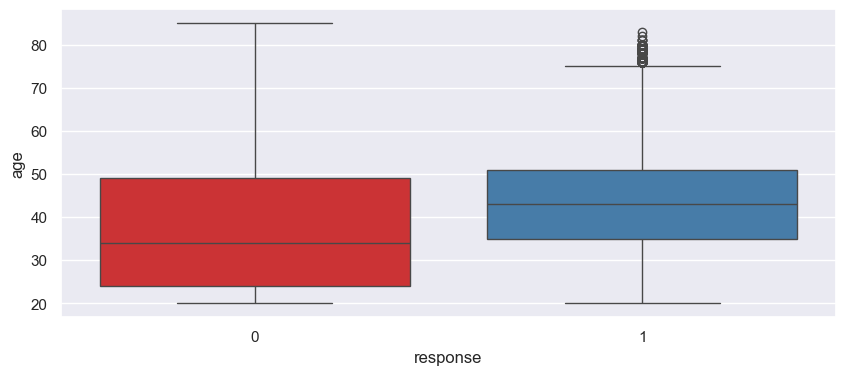

In [125]:
# Age
plt.figure(figsize= (10, 4))
sns.boxplot(x='response', y='age', data=df3, palette='Set1');

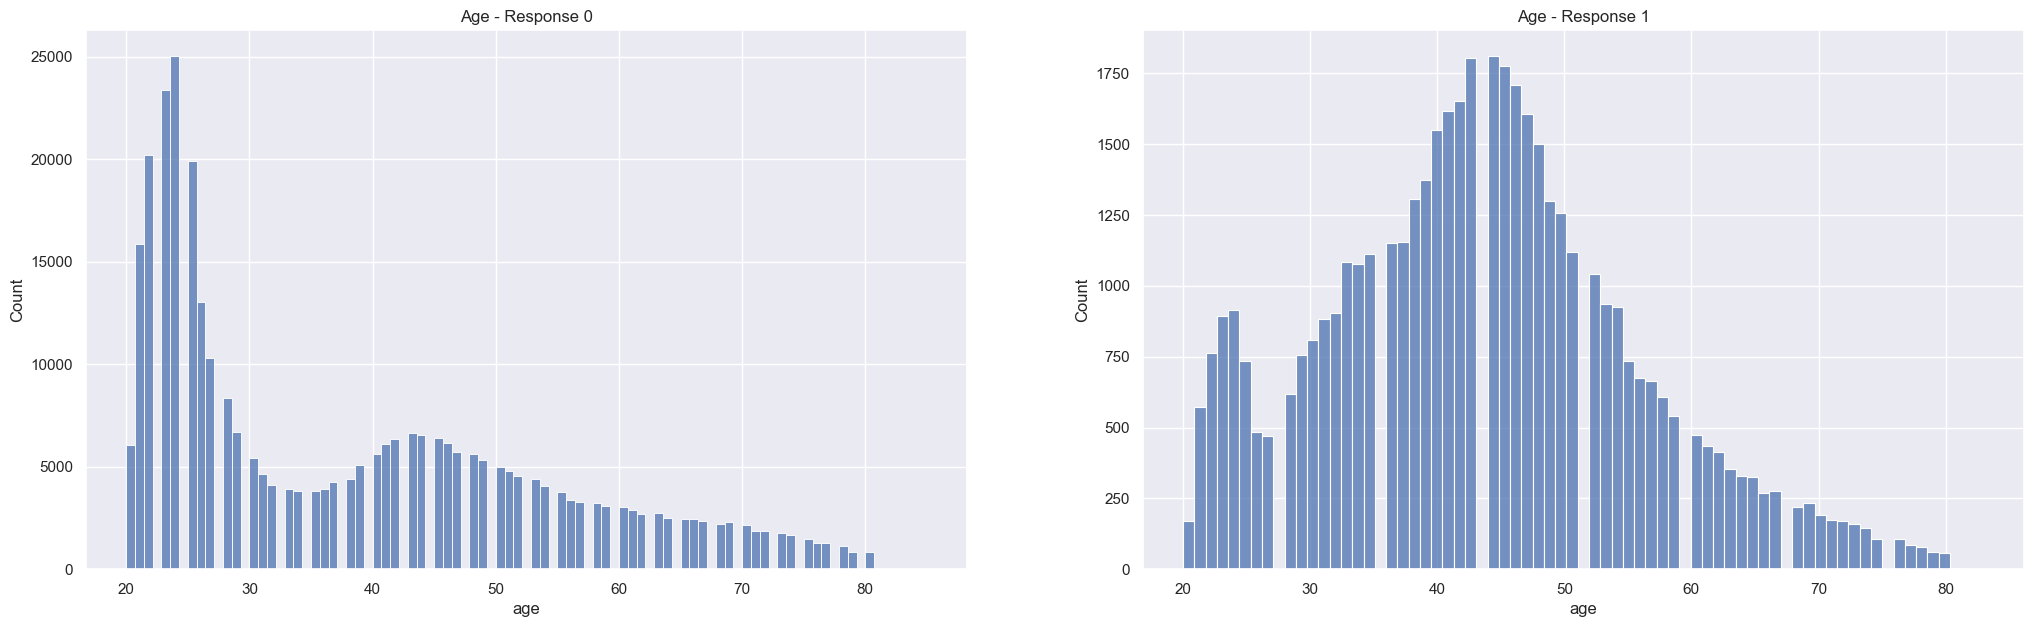

<Figure size 1000x400 with 0 Axes>

In [134]:
# Age histogram
fig, axes = plt.subplots(1,2)
plt.figure(figsize= (10, 4))

aux1 = df3.loc[df3['response'] == 0, 'age']
aux2 = df3.loc[df3['response'] == 1, 'age']

sns.histplot(aux1, ax = axes.ravel()[0]);
sns.histplot(aux2, ax = axes.ravel()[1]);

axes.ravel()[0].set_title('Age - Response 0');
axes.ravel()[1].set_title('Age - Response 1');